# RUSYA UKRAYNA SAVAŞI: RUS ORDUSUNUN ZAYİAT SAYISI TAHMİNİ (LINEAR REGRESSION)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
RPersonelLoss = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv')
REquipmentLoss = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment_correction.csv')


# Veriyi inceleyelim

In [3]:
RPersonelLoss.shape

(1081, 5)

In [4]:
RPersonelLoss.head()

,date,day,personnel,personnel*,POW
0,2025-02-09,1082,849320,about,NaN
1,2025-02-08,1081,847860,about,NaN
2,2025-02-07,1080,846650,about,NaN
3,2025-02-06,1079,845310,about,NaN
4,2025-02-05,1078,844070,about,NaN


In [5]:
RPersonelLoss.tail()

,date,day,personnel,personnel*,POW
1076,2022-03-01,6,5710,about,200.0
1077,2022-02-28,5,5300,about,0.0
1078,2022-02-27,4,4500,about,0.0
1079,2022-02-26,3,4300,about,0.0
1080,2022-02-25,2,2800,about,0.0


In [6]:
RPersonelLoss.dtypes

date           object
day             int64
personnel       int64
personnel*     object
POW           float64
dtype: object

# Veriyi Düzenleyelim 

In [7]:


RPersonelLoss = RPersonelLoss.drop('personnel*', axis = 'columns')


In [8]:
RPersonelLoss = RPersonelLoss.sort_values('date')


In [9]:
RPersonelLoss.fillna(0, inplace = True)

In [10]:
RPersonelLoss

,date,day,personnel,POW
1080,2022-02-25,2,2800,0.0
1079,2022-02-26,3,4300,0.0
1078,2022-02-27,4,4500,0.0
1077,2022-02-28,5,5300,0.0
1076,2022-03-01,6,5710,200.0
...,...,...,...,...
4,2025-02-05,1078,844070,0.0
3,2025-02-06,1079,845310,0.0
2,2025-02-07,1080,846650,0.0
1,2025-02-08,1081,847860,0.0


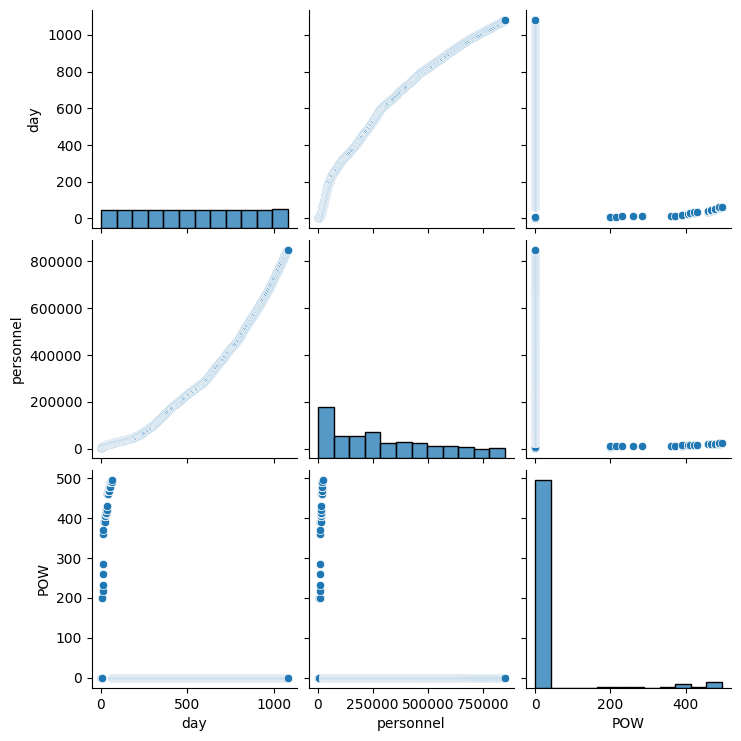

In [11]:
sns.pairplot(RPersonelLoss, vars = ['day', 'personnel', 'POW'])
plt.show()

# Burada sadece gün ve zayiat arasında anlamlı bir ilişki kurabiliyoruz

<Axes: xlabel='day', ylabel='personnel'>

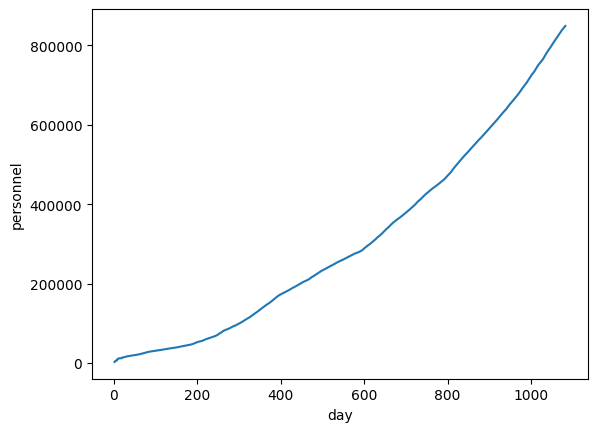

In [12]:
sns.lineplot(RPersonelLoss, x='day', y='personnel')

In [13]:
x = RPersonelLoss['day']
y = RPersonelLoss['personnel']
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [14]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(x, y)
x_predict = [[1478]]
y_predict = regr.predict(x_predict)
print(y_predict)

[[1016842.1710968]]


# Modelimize göre savaşın 1478'nci günü(12 Mart 2026) Rus ordusunun toplam zayiat sayısı 1.000.000(bir milyon)'u geçecek.

# Modelimizin tutarlı/isabetli olup olmadığını görmek için R^2'sine bakalım.

In [15]:
from sklearn.metrics import r2_score
r_squared = regr.score(x, y)
print(r_squared)

0.9543476426266142


# Modelimizin R^2'si 0.95 çıktı. Yani modelimizin tutarlı/isabetli olduğunu söyleyebiliriz. Fakat R^2'mizin 0.95 çıkması bize gün ve kaybedilen personel sayısında multicollinearity olduğunu gösterebilir. 

In [16]:
noDate = RPersonelLoss.drop('date', axis = 1)
corrM = noDate.corr()
corrM

,day,personnel,POW
day,1.000000,0.976907,-0.376686
personnel,0.976907,1.000000,-0.279808
POW,-0.376686,-0.279808,1.000000


# Gün ve kaybedilen personel arasında multicollinearity olduğunu gördük. Fakat bu modelimizin yanlış tahminlerde bulunacağını göstermez.